# Corona_Virus_Project

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
df=pd.read_csv('C:/Users/Neha Madam/OneDrive/Desktop/ETLHIVE/PYTHON/PROJECT 2/Python_projects/Corona_virus_analyst_project/covid_19_data.csv')

In [5]:
df

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [11]:
df.shape

(306429, 8)

In [13]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [87]:
# 1.What is the total number of confirmed cases worldwide?
total_confirmed=df['Confirmed'].sum()
print(f'Total Confirmed Cases Worldwide : {total_confirmed}')

Total Confirmed Cases Worldwide : 26252051758.0


In [79]:
# 2.How many deaths have been reported globally?
total_death=df['Deaths'].sum()
print(f'Total Death : {total_death}' )

Total Death : 624013017.0


In [115]:
# 2.How many deaths have been reported globally?
total_death=df['Deaths'].count()
print(f'Total Death : {total_death}' )

Total Death : 306429


In [83]:
# 3.What is the total number of recovered cases worldwide?
recovered_cases=df['Recovered'].sum()
print(f'Total Recovered Cases Worldwide : {recovered_cases}')

Total Recovered Cases Worldwide : 15450237912.0


In [85]:
# 4.How many countries/regions are represented in the dataset?
num_countries = df['Country/Region'].nunique()
print(f"Number of Countries/Region : {num_countries}")

Number of Countries/Region : 229


<Axes: title={'center': 'Trend of Confirmed Cases Over Time Globally'}, xlabel='ObservationDate'>

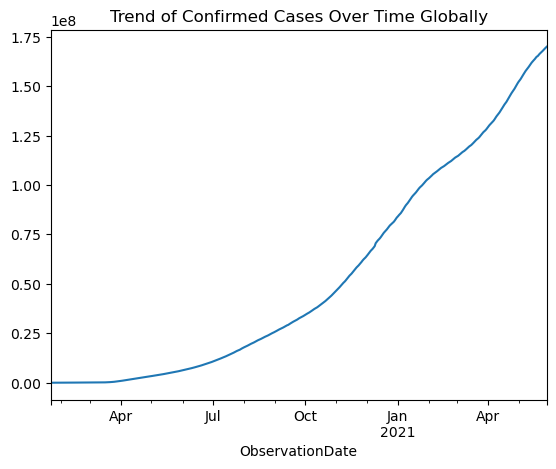

In [89]:
# 5.What is the trend of confirmed cases over time globally?
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
trend_confirmed = df.groupby('ObservationDate')['Confirmed'].sum()
trend_confirmed.plot(title="Trend of Confirmed Cases Over Time Globally")

In [109]:
# 6.Which province/state has reported the highest number of confirmed cases?
highest_confirmed_province = df.groupby('Province/State')['Confirmed'].sum().idxmax()
print(f"Province/State with the highest confirmed cases: {highest_confirmed_province}")

Province/State with the highest confirmed cases: California


In [113]:
# 7.Which country/region has the highest number of deaths?
highest_num_deaths= df.groupby(by='Country/Region')['Deaths'].max().head(1)
print(f'Highest Number Of Deaths of Country/Region :{highest_num_deaths}')

Highest Number Of Deaths of Country/Region :Country/Region
Azerbaijan    0.0
Name: Deaths, dtype: float64


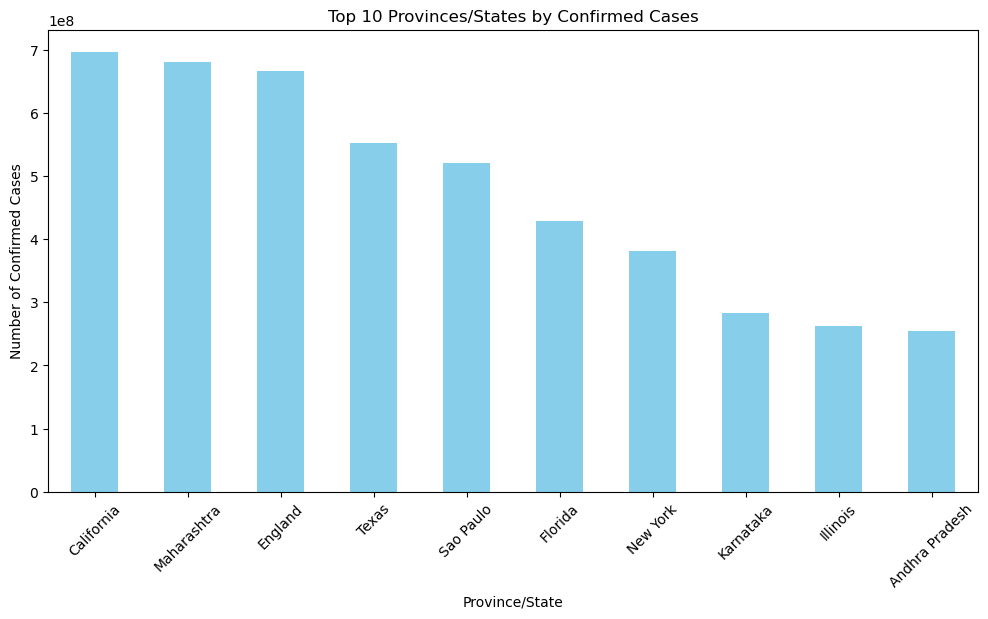

In [8]:
# 8.How does the number of confirmed cases vary across different provinces/states?
confirmed_by_province = df.groupby('Province/State')['Confirmed'].sum()
top_10_confirmed_by_province = confirmed_by_province.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_10_confirmed_by_province.plot(kind='bar', title="Top 10 Provinces/States by Confirmed Cases", color='skyblue')
plt.ylabel("Number of Confirmed Cases")
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Trend of Deaths Over Time Globally'}, xlabel='ObservationDate'>

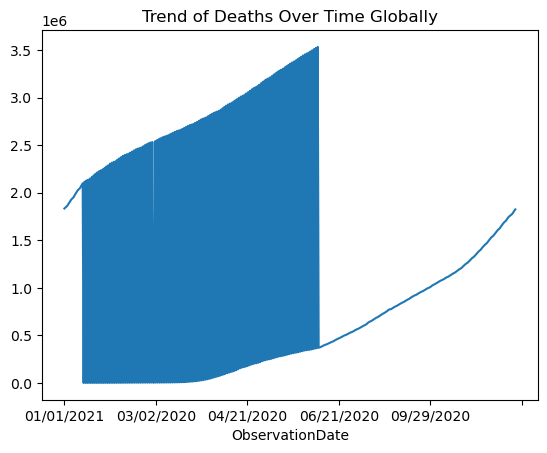

In [13]:
# 9.What is the trend of deaths over time globally?
trend_deaths = df.groupby('ObservationDate')['Deaths'].sum()
trend_deaths.plot(title="Trend of Deaths Over Time Globally")

In [25]:
# 10.Which country/region has the highest number of recovered cases?
highest_recovered_country = df.groupby('Country/Region')['Recovered'].sum().idxmax()
print(f"Country/Region with the highest recovered cases: {highest_recovered_country}")

Country/Region with the highest recovered cases: India


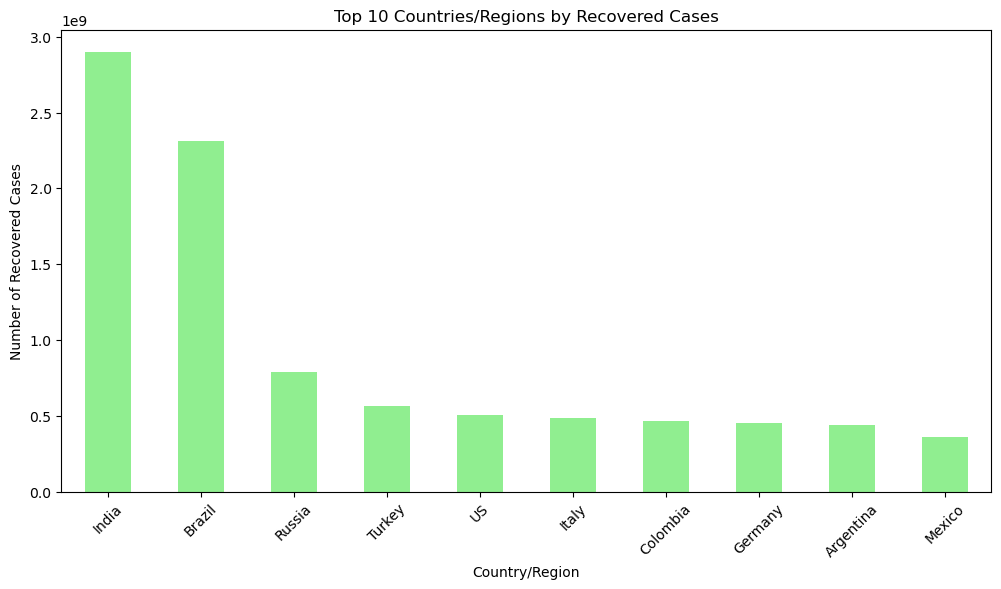

In [27]:
# 11.How does the number of recovered cases vary across different countries/regions?
recovered_by_country = df.groupby('Country/Region')['Recovered'].sum()
#select the top 10 becouse there are to many values
top_10_recovered_by_country = recovered_by_country.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_10_recovered_by_country.plot(kind='bar', title="Top 10 Countries/Regions by Recovered Cases", color='lightgreen')
plt.ylabel("Number of Recovered Cases")
plt.xticks(rotation=45)
plt.show()

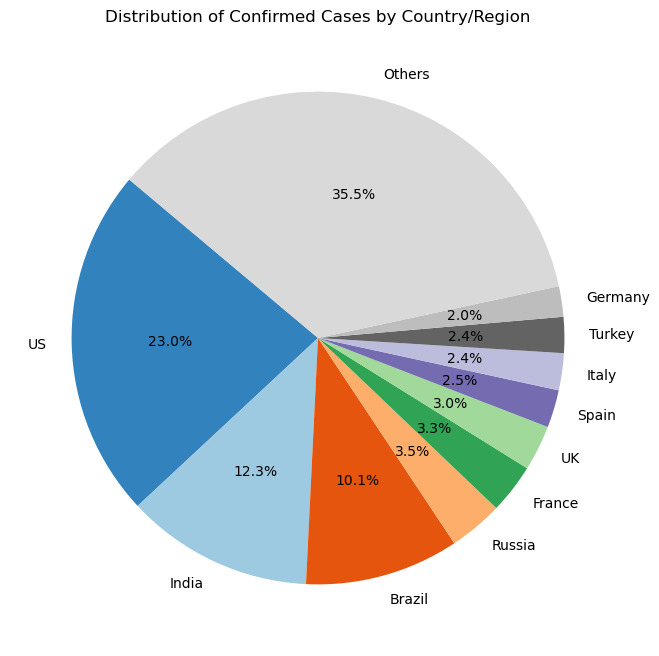

In [29]:
# 12.What is the distribution of confirmed cases by country/region?
confirmed_by_country = df.groupby('Country/Region')['Confirmed'].sum()

# Sort the values in descending order and select the top 10 becouse there are to many values
top_10_confirmed_by_country = confirmed_by_country.sort_values(ascending=False).head(10)
others = confirmed_by_country.sort_values(ascending=False).iloc[10:].sum()
top_10_confirmed_by_country['Others'] = others

plt.figure(figsize=(10, 8))
top_10_confirmed_by_country.plot(kind='pie', autopct='%1.1f%%', title="Distribution of Confirmed Cases by Country/Region", startangle=140, colormap='tab20c')
plt.ylabel("")  # Hide the default ylabel
plt.show()


In [31]:
# 13.Is there a correlation between the number of confirmed cases and deaths?
correlation_confirmed_deaths = df[['Confirmed', 'Deaths']].corr().iloc[0, 1]
print(f"Correlation between confirmed cases and deaths: {correlation_confirmed_deaths}")

Correlation between confirmed cases and deaths: 0.8884159872096549


In [33]:
# 14.Is there a correlation between the number of confirmed cases and recovered cases?
correlation_confirmed_recovered = df[['Confirmed', 'Recovered']].corr().iloc[0, 1]
print(f"Correlation between confirmed cases and recovered cases: {correlation_confirmed_recovered}")

Correlation between confirmed cases and recovered cases: 0.6334793001461968


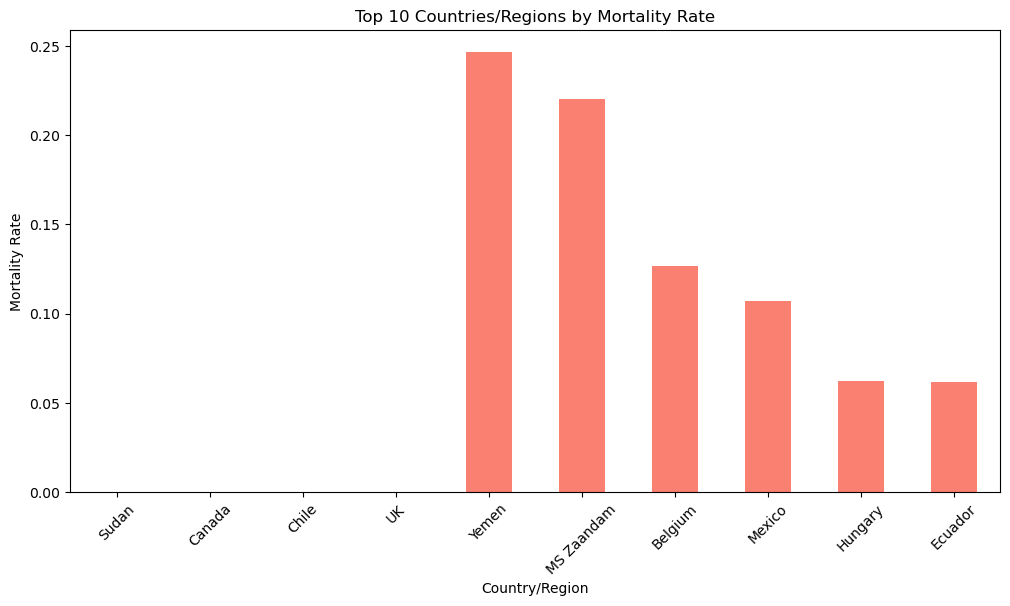

In [35]:
# 15.How does the mortality rate vary across different countries/regions?
df['Mortality Rate'] = df['Deaths'] / df['Confirmed']
mortality_rate_by_country = df.groupby('Country/Region')['Mortality Rate'].mean()

# Sort the values in descending order and select the top 10
top_10_mortality_rate_by_country = mortality_rate_by_country.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_10_mortality_rate_by_country.plot(kind='bar', title="Top 10 Countries/Regions by Mortality Rate", color='salmon')
plt.ylabel("Mortality Rate")
plt.xticks(rotation=45)
plt.show()

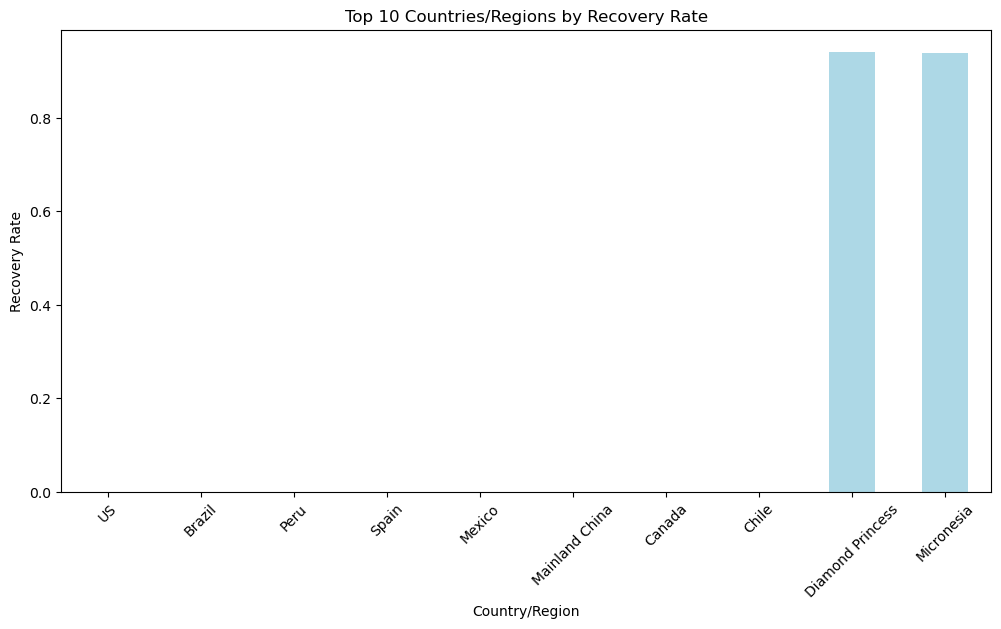

In [37]:
# 16.How does the recovery rate vary across different countries/regions?
df['Recovery Rate'] = df['Recovered'] / df['Confirmed']
recovery_rate_by_country = df.groupby('Country/Region')['Recovery Rate'].mean()
# Sort the values in descending order and select the top 10
top_10_recovery_rate_by_country = recovery_rate_by_country.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_10_recovery_rate_by_country.plot(kind='bar', title="Top 10 Countries/Regions by Recovery Rate", color='lightblue')
plt.ylabel("Recovery Rate")
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Trend of New Confirmed Cases Over Time Globally'}, xlabel='ObservationDate'>

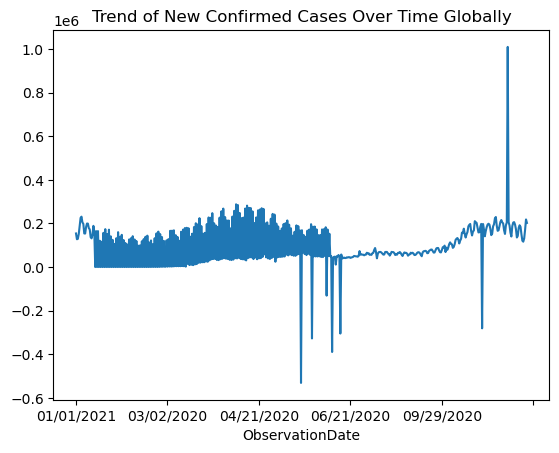

In [39]:
# 17.What is the trend of new confirmed cases over time globally?
df['New Confirmed'] = df.groupby('Country/Region')['Confirmed'].diff().fillna(0)
trend_new_confirmed = df.groupby('ObservationDate')['New Confirmed'].sum()
trend_new_confirmed.plot(title="Trend of New Confirmed Cases Over Time Globally")

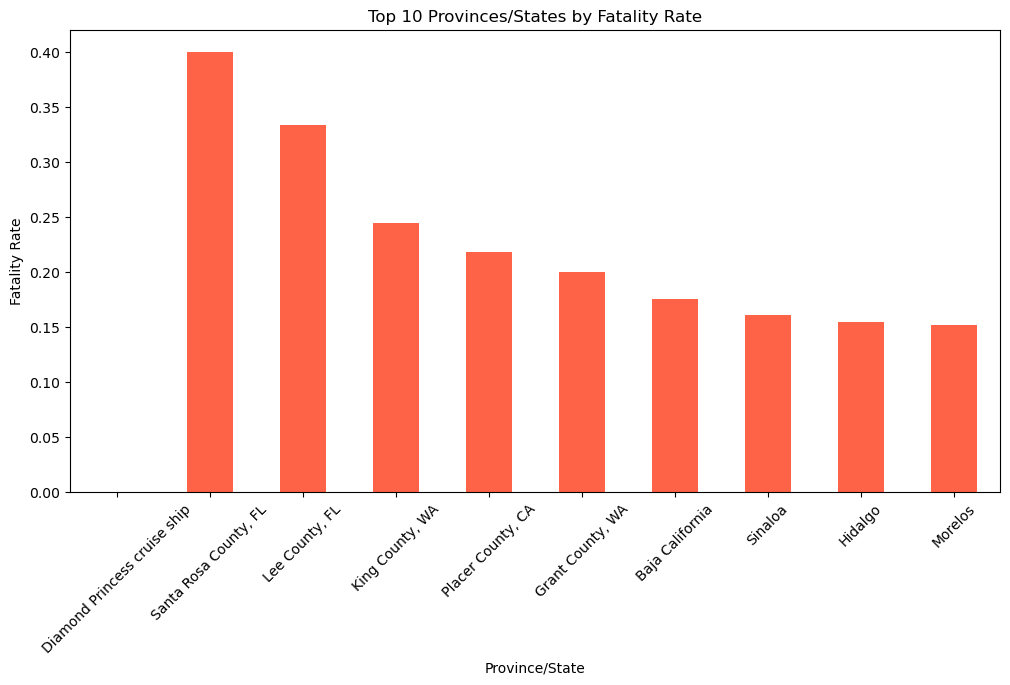

In [41]:
# 18.How does the fatality rate vary across different provinces/states?
df['Fatality Rate'] = df['Deaths'] / df['Confirmed']
fatality_rate_by_province = df.groupby('Province/State')['Fatality Rate'].mean()

# Sort the values in descending order and select the top 10
top_10_fatality_rate_by_province = fatality_rate_by_province.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_10_fatality_rate_by_province.plot(kind='bar', title="Top 10 Provinces/States by Fatality Rate", color='tomato')
plt.ylabel("Fatality Rate")
plt.xticks(rotation=45)
plt.show()

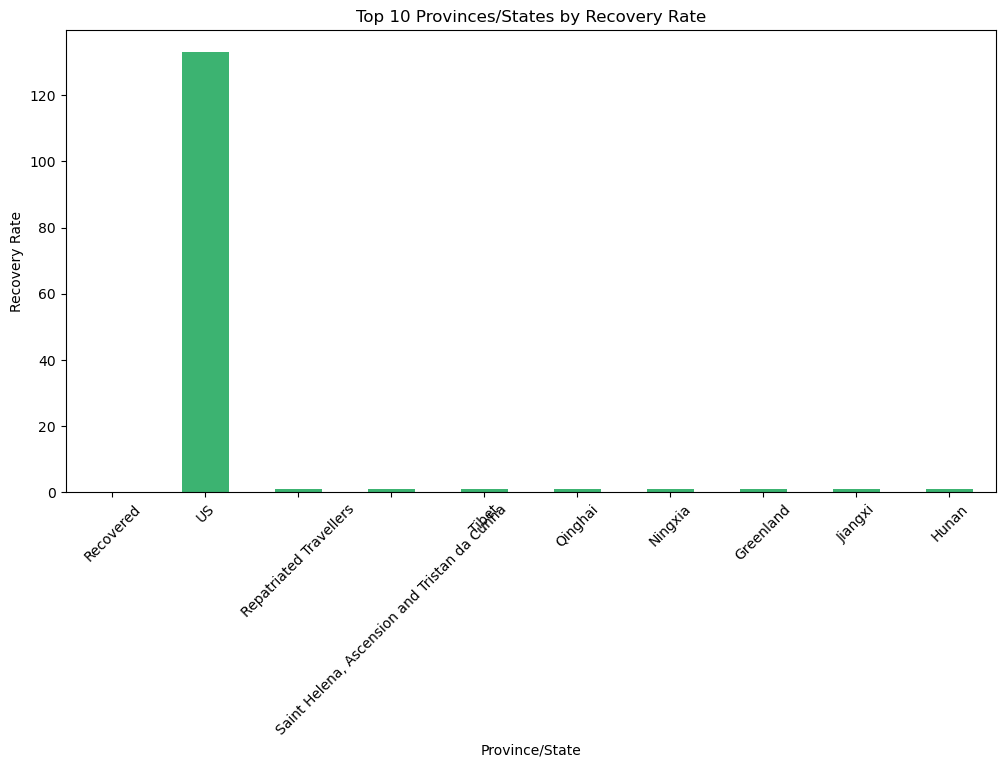

In [43]:
# 19.How does the recovery rate vary across different provinces/states?
df['Recovery Rate'] = df['Recovered'] / df['Confirmed']
recovery_rate_by_province = df.groupby('Province/State')['Recovery Rate'].mean()

# Sort the values in descending order and select the top 10
top_10_recovery_rate_by_province = recovery_rate_by_province.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_10_recovery_rate_by_province.plot(kind='bar', title="Top 10 Provinces/States by Recovery Rate", color='mediumseagreen')
plt.ylabel("Recovery Rate")
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Trend of Active Cases Over Time Globally'}, xlabel='ObservationDate'>

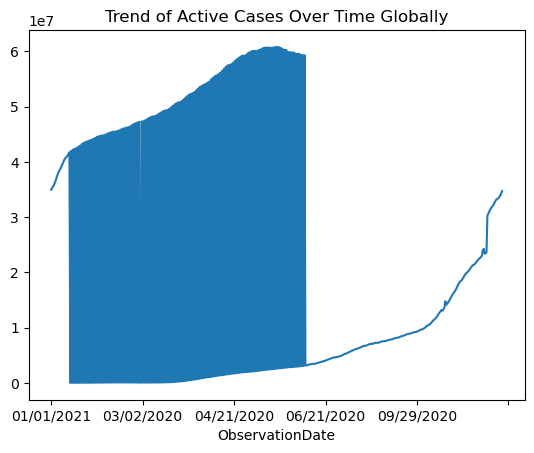

In [45]:
# 20.What is the trend of active cases over time globally?
df['Active Cases'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
trend_active_cases = df.groupby('ObservationDate')['Active Cases'].sum()
trend_active_cases.plot(title="Trend of Active Cases Over Time Globally")